In [ ]:
!pip install qiskit[nature]

In [ ]:
!pip install pyscf --quiet

     |████████████████████████████████| 37.5 MB 1.2 MB/s 


In [ ]:
from qiskit import Aer
from qiskit_nature.drivers import UnitsType, Molecule
from qiskit_nature.drivers.second_quantization import ElectronicStructureDriverType, ElectronicStructureMoleculeDriver
from qiskit_nature.problems.second_quantization import ElectronicStructureProblem
from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit_nature.mappers.second_quantization import JordanWignerMapper

In [ ]:
import numpy as np
from qiskit import IBMQ
from qiskit.providers.aer.noise import NoiseModel
from qiskit.utils import QuantumInstance
from qiskit.ignis.mitigation.measurement import CompleteMeasFitter

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  """


In [ ]:
molecule = Molecule(geometry=[['H', [0., 0., 0.]],
                              ['H', [0., 0., 0.735]]],
                     charge=0, multiplicity=1)

In [ ]:
driver = ElectronicStructureMoleculeDriver(molecule, basis='sto3g', driver_type=ElectronicStructureDriverType.PYSCF)

es_problem = ElectronicStructureProblem(driver)
qubit_converter = QubitConverter(JordanWignerMapper())

In [ ]:
from qiskit.algorithms import NumPyMinimumEigensolver

numpy_solver = NumPyMinimumEigensolver()

In [ ]:
#provider = IBMQ.get_provider('ibm-q')

In [ ]:
#qcomp = provider.get_backend('ibmq_manila')

In [ ]:
from qiskit.providers.aer import StatevectorSimulator
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit_nature.algorithms import VQEUCCFactory

#quantum_instance = QuantumInstance(backend = qcomp)
vqe_solver = VQEUCCFactory(quantum_instance)

In [ ]:
from qiskit.algorithms import VQE
from qiskit.circuit.library import TwoLocal

tl_circuit = TwoLocal(rotation_blocks = ['h', 'rx'], entanglement_blocks = 'cz',
                      entanglement='full', reps=2, parameter_prefix = 'y')

another_solver = VQE(ansatz = tl_circuit,
                     quantum_instance = QuantumInstance(Aer.get_backend("qasm_simulator")))

In [ ]:
from qiskit_nature.algorithms import GroundStateEigensolver

calc = GroundStateEigensolver(qubit_converter, vqe_solver)
res = calc.solve(es_problem)

print(res)

=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -0.86399467856
  - computed part:      -0.86399467856
~ Nuclear repulsion energy (Hartree): 0.719968994449
> Total ground state energy (Hartree): -0.144025684111
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 1.990 S: 0.298 S^2: 0.386 M: -0.002
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  1.3889487]
 
  0: 
  * Electronic dipole moment (a.u.): [0.0  0.0  0.06034012]
    - computed part:      [0.0  0.0  0.06034012]
  > Dipole moment (a.u.): [0.0  0.0  1.32860858]  Total: 1.32860858
                 (debye): [0.0  0.0  3.37698584]  Total: 3.37698584
 


In [ ]:
res.total_energies

array([-1.13730604])

In [ ]:
calc = GroundStateEigensolver(qubit_converter, numpy_solver)
res = calc.solve(es_problem)
print(res)


=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -1.857275030202
  - computed part:      -1.857275030202
~ Nuclear repulsion energy (Hartree): 0.719968994449
> Total ground state energy (Hartree): -1.137306035753
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.000 S: 0.000 S^2: 0.000 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  1.3889487]
 
  0: 
  * Electronic dipole moment (a.u.): [0.0  0.0  1.3889487]
    - computed part:      [0.0  0.0  1.3889487]
  > Dipole moment (a.u.): [0.0  0.0  0.0]  Total: 0.0
                 (debye): [0.0  0.0  0.0]  Total: 0.0
 


In [ ]:
np.arange(0.5,2,0.1)

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9])

In [ ]:
from qiskit.algorithms import VQE
from qiskit.circuit.library import TwoLocal
VQEi = np.array([])
NpE = np.array([])
#Initiating solvers
numpy_solver = NumPyMinimumEigensolver()
provider = IBMQ.get_provider(hub='ibm-q')
backend = Aer.get_backend("qasm_simulator")
device = provider.get_backend("ibmq_lima")
coupling_map = device.configuration().coupling_map
noise_model = NoiseModel.from_backend(device.properties())
#quantum_instance = QuantumInstance(backend=backend, 
#                                   shots=8192, 
#                                   noise_model=noise_model, 
#                                   coupling_map=coupling_map,
#                                   measurement_error_mitigation_cls=CompleteMeasFitter,
#                                   cals_matrix_refresh_period=30)

#noise_model = NoiseModel.from_backend(device.properties())
quantum_instance2 = QuantumInstance(backend=backend, 
                                   shots=1024, 
                                   noise_model=noise_model, 
                                   coupling_map=coupling_map,
                                   measurement_error_mitigation_cls=CompleteMeasFitter,
                                   cals_matrix_refresh_period=30)


vqe_solver = VQEUCCFactory(quantum_instance2) #Kept it out of the loop
#Quantum Circuits
tl_circuit = TwoLocal(rotation_blocks = ['h', 'rx'], entanglement_blocks = 'cz',
                      entanglement='full', reps=3, parameter_prefix = 'y')

another_solver = VQE(ansatz = tl_circuit,
                     quantum_instance = quantum_instance2)

qubit_converter = QubitConverter(JordanWignerMapper())

drange = np.arange(0.5,2,0.1)
for d in drange:
  molecule = Molecule(geometry=[['H', [0., 0., 0.]],
                              ['H', [0., 0., d]]],
                     charge=0, multiplicity=1)
  driver = ElectronicStructureMoleculeDriver(molecule, basis='sto3g', driver_type=ElectronicStructureDriverType.PYSCF)

  es_problem = ElectronicStructureProblem(driver)
  calcVQE = GroundStateEigensolver(qubit_converter, another_solver)
  calcNpE = GroundStateEigensolver(qubit_converter, numpy_solver)
  resVQE = calcVQE.solve(es_problem)
  resNpE = calcNpE.solve(es_problem)
  VQEi = np.append(VQEi,resVQE.total_energies)
  NpE = np.append(NpE,resNpE.total_energies)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print(tl_circuit)

     »
q_0: »
     »
q_1: »
     »
q_2: »
     »
q_3: »
     »
«     ┌──────────────────────────────────────────────────────────────────────────┐
«q_0: ┤0                                                                         ├
«     │                                                                          │
«q_1: ┤1                                                                         ├
«     │  TwoLocal(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],y[11]) │
«q_2: ┤2                                                                         ├
«     │                                                                          │
«q_3: ┤3                                                                         ├
«     └──────────────────────────────────────────────────────────────────────────┘


Text(0.5, 1.0, 'Ground state energy of H_2 molecule as a function of interatomic seperation')

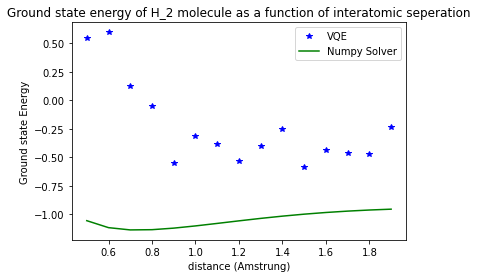

In [ ]:
plt.plot(drange, VQEi,'b*', label='VQE')
plt.plot(drange, NpE,'g-', label='Numpy Solver')
plt.legend()
plt.xlabel("distance (Amstrung)")
plt.ylabel("Ground state Energy")
plt.title("Ground state energy of H_2 molecule as a function of interatomic seperation")

In [ ]:
from scipy.stats import sem
sem(VQEi-NpE)

0.10559789675735108

In [ ]:
molecule = Molecule(geometry=[['H', [0., 0., 0.]],
                              ['H', [0., 0., 0.735]]],
                     charge=0, multiplicity=1)

In [ ]:
driver = ElectronicStructureMoleculeDriver(molecule, basis='sto3g', driver_type=ElectronicStructureDriverType.PYSCF)

In [ ]:
m = driver.run()

In [ ]:
h1 = m.one_body_integrals
print(h1)

AttributeError: ignored

In [ ]:
m.__dict__

{'_name': 'ElectronicStructureDriverResult',
 '_properties': {'AngularMomentum': <qiskit_nature.properties.second_quantization.electronic.angular_momentum.AngularMomentum at 0x7f5355089e10>,
  'DriverMetadata': <qiskit_nature.properties.second_quantization.driver_metadata.DriverMetadata at 0x7f5355089d10>,
  'ElectronicBasisTransform': <qiskit_nature.properties.second_quantization.electronic.bases.electronic_basis_transform.ElectronicBasisTransform at 0x7f535515e610>,
  'ElectronicDipoleMoment': <qiskit_nature.properties.second_quantization.electronic.dipole_moment.ElectronicDipoleMoment at 0x7f5355089a50>,
  'ElectronicEnergy': <qiskit_nature.properties.second_quantization.electronic.electronic_energy.ElectronicEnergy at 0x7f5355089dd0>,
  'Magnetization': <qiskit_nature.properties.second_quantization.electronic.magnetization.Magnetization at 0x7f5355089fd0>,
  'ParticleNumber': <qiskit_nature.properties.second_quantization.electronic.particle_number.ParticleNumber at 0x7f535c6f2650>}

In [ ]:
m.ElectronicEnergy

AttributeError: ignored

In [ ]:
es_problem = ElectronicStructureProblem(driver)

In [ ]:
es_problem.__dict__

{'_grouped_property': None,
 '_grouped_property_transformed': None,
 '_legacy_driver': False,
 '_legacy_transform': False,
 '_main_property_name': 'ElectronicEnergy',
 '_molecule_data': None,
 '_molecule_data_transformed': None,
 'driver': <qiskit_nature.drivers.second_quantization.electronic_structure_molecule_driver.ElectronicStructureMoleculeDriver at 0x7f53540f8550>,
 'transformers': []}

In [ ]:
from qiskit import IBMQ

In [ ]:
IBMQ.save_account(TOKEN)

In [ ]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>